In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data
raw_data=pd.read_csv('adult.csv',header=0)

raw_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


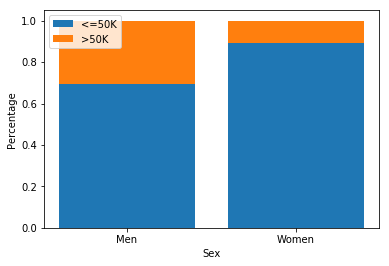

In [11]:
#Which gender has a higher income level?  

n=2

Lessthan50KRatios = [(len((raw_data[(raw_data['income'] == '<=50K') & (raw_data['sex'] == 'Male')].index))/len((raw_data[(raw_data['sex'] == 'Male')].index))),(len((raw_data[(raw_data['income'] == '<=50K') & (raw_data['sex'] == 'Female')].index))/len((raw_data[(raw_data['sex'] == 'Female')].index)))]
Greaterthan50KRatios = [(len((raw_data[(raw_data['income'] == '>50K') & (raw_data['sex'] == 'Male')].index))/len((raw_data[(raw_data['sex'] == 'Male')].index))),(len((raw_data[(raw_data['income'] == '>50K') & (raw_data['sex'] == 'Female')].index))/len((raw_data[(raw_data['sex'] == 'Female')].index)))]

ind = np.arange(n)
p1 = plt.bar(ind, Lessthan50KRatios)
p2 = plt.bar(ind, Greaterthan50KRatios,bottom=Lessthan50KRatios)
plt.xticks(ind, ('Men', 'Women'))
plt.legend((p1[0], p2[0]), ('<=50K', '>50K'))
plt.xlabel('Sex')
plt.ylabel('Percentage')

plt.show()

The above stacked bar chart shows that a higher percentage of men earn above 50K annually (about 31%) as opposed to women (about 11% of whom earn that much).

Hours per week of people who make 50K or under annually:
 count    24720.000000
mean        38.840210
std         12.318995
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours.per.week, dtype: float64 

Hours per week of people who make over 50K annually:
 count    7841.000000
mean       45.473026
std        11.012971
min         1.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: hours.per.week, dtype: float64


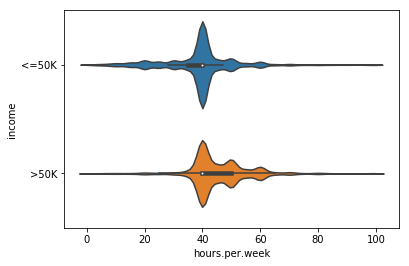

In [25]:
#What is the relationship between hours worked per week and income level? What is the correlation?

print('Hours per week of people who make 50K or under annually:\n',raw_data['hours.per.week'][(raw_data['income'] == '<=50K')].describe(),'\n\nHours per week of people who make over 50K annually:\n',raw_data['hours.per.week'][(raw_data['income'] == '>50K')].describe())

sns.violinplot(y='income',x='hours.per.week',data=raw_data,scale='area')
plt.show()



The violin plots above show that while the majority of people in both income groups work 40 hour weeks, a greater proportion of people who make over 50K a year work more than 40 hours a week and likewise, a greater proportion of people who make under 50K a year work less than 40 hours a week.

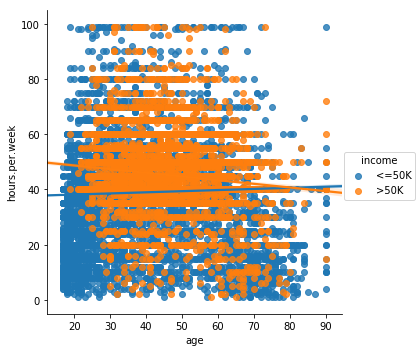

In [59]:
#What is the relationship between a person’s age, hours worked per week and their income level?

sns.lmplot(x='age',y='hours.per.week',data=raw_data,hue='income')
plt.show()

The above scatter plot doesn't tell us much so let's compare the variables separately.

In [65]:
#Check the correlation between hours worked per week and age
raw_data[['hours.per.week','age']].corr()

,hours.per.week,age
hours.per.week,1.000000,0.068756
age,0.068756,1.000000


There doesn't seem to be a correlation between between hours worked per week and age.

Age of people who make 50K or under annually:
 count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64 

Age of people who make over 50K annually:
 count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64


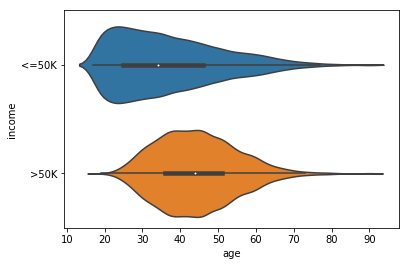

In [68]:
#Look at the relationship between income and age
print('Age of people who make 50K or under annually:\n',raw_data['age'][(raw_data['income'] == '<=50K')].describe(),'\n\nAge of people who make over 50K annually:\n',raw_data['age'][(raw_data['income'] == '>50K')].describe())

sns.violinplot(y='income',x='age',data=raw_data)
plt.show()

As we expected, the above violin plot shows that the population of people who make over 50K annually skews older than the population of people who make less than or equal to 50K annually.

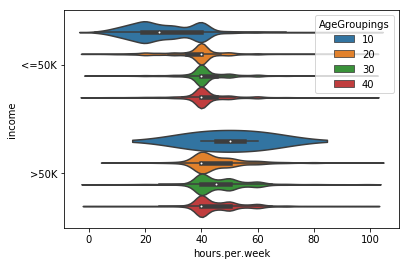

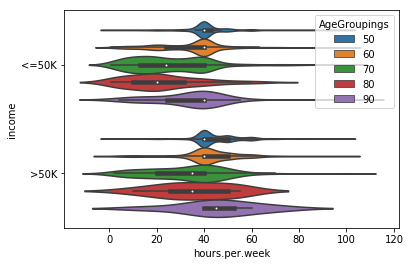

In [79]:
raw_data['AgeGroupings']=grouped['age'].astype(str).str[:-1]+'0'

sns.violinplot(y='income',x='hours.per.week',data=raw_data[(raw_data['AgeGroupings'] < '50')],scale='width',hue='AgeGroupings')
plt.show()
sns.violinplot(y='income',x='hours.per.week',data=raw_data[(raw_data['AgeGroupings'] >= '50')],scale='width',hue='AgeGroupings')

As the above violin plots shows, those who work above 40 hours a week, are more likely to earn more than 50K annually but generally, the median will be the same between income groups. There are a few interesting things to note though:

* There is a very large difference in terms of hours worked per week between teenagers who earn less than 50K and those who earn greater than 50K a year

* The distribution of hours worked drops for people in their 70's and 80's which is to be expected because they've retired but then it appears to go up for people in their 90's. We assumed this would have been from a few outliers but as you can see below, that doesn't seem to be the case.

In [91]:
print('Hours worked per week by people in their 70s\n',raw_data['hours.per.week'][(raw_data['AgeGroupings'] == '70')].describe(),'\n')
print('Hours worked per week by people in their 80s\n',raw_data['hours.per.week'][(raw_data['AgeGroupings'] == '80')].describe(),'\n')
print('Hours worked per week by people in their 90s\n',raw_data['hours.per.week'][(raw_data['AgeGroupings'] == '90')].describe(),'\n')

Hours worked per week by people in their 70s
 count    508.000000
mean      26.777559
std       16.268571
min        1.000000
25%       14.000000
50%       25.000000
75%       40.000000
max       99.000000
Name: hours.per.week, dtype: float64 

Hours worked per week by people in their 80s
 count    78.000000
mean     23.884615
std      15.992678
min       1.000000
25%      10.750000
50%      20.000000
75%      35.000000
max      66.000000
Name: hours.per.week, dtype: float64 

Hours worked per week by people in their 90s
 count    43.000000
mean     36.813953
std      17.243709
min       4.000000
25%      27.500000
50%      40.000000
75%      40.000000
max      99.000000
Name: hours.per.week, dtype: float64 

